# Business Analytics Project

This notebook demonstrates exploratory data analysis (EDA) and predictive modeling on a synthetic business dataset. The dataset includes monthly sales, marketing spend, profits, and customer satisfaction metrics across different regions and product categories.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('synthetic_business_data.csv')

# Display first few rows
df.head()

,Month,Region,ProductCategory,MarketingSpend,Sales,Profit,CustomerSatisfaction
0,2021-06,North,Electronics,37148,88641,2293,64.50
1,2021-01,South,Furniture,56440,66702,-30069,64.76
2,2021-04,North,Food,37647,41161,-21781,61.24
3,2021-12,North,Electronics,30803,93749,7705,64.05
4,2021-04,East,Clothing,52929,61399,-29413,57.56


## Descriptive Statistics
Let's examine summary statistics for numeric columns.

In [2]:
df.describe()

,MarketingSpend,Sales,Profit,CustomerSatisfaction
count,500.000000,500.000000,500.000000,500.000000
mean,50112.284000,60684.426000,-25898.870000,67.503180
std,14584.259441,19865.648156,15931.879492,5.269471
min,10546.000000,25765.000000,-64329.000000,54.330000
25%,39485.250000,44160.000000,-36198.000000,63.730000
50%,50074.500000,57824.000000,-25901.500000,67.675000
75%,60131.250000,75552.250000,-16387.250000,71.130000
max,88245.000000,111475.000000,19509.000000,86.660000


## Average Sales by Region
The bar plot below shows average sales across different regions.

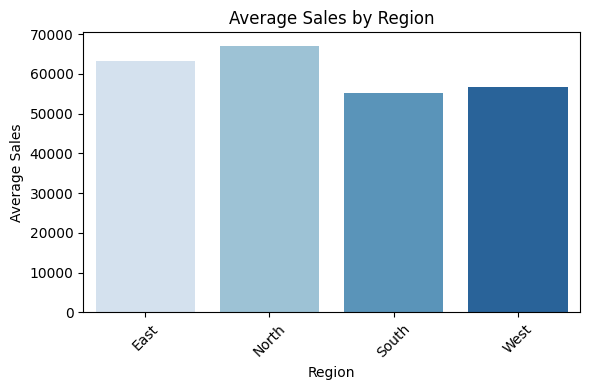

In [3]:
plt.figure(figsize=(6,4))
avg_sales = df.groupby('Region')['Sales'].mean().reset_index()
sns.barplot(x='Region', y='Sales', data=avg_sales, palette='Blues')
plt.title('Average Sales by Region')
plt.ylabel('Average Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Marketing Spend vs Sales
A scatter plot to visualize the relationship between marketing spend and sales.

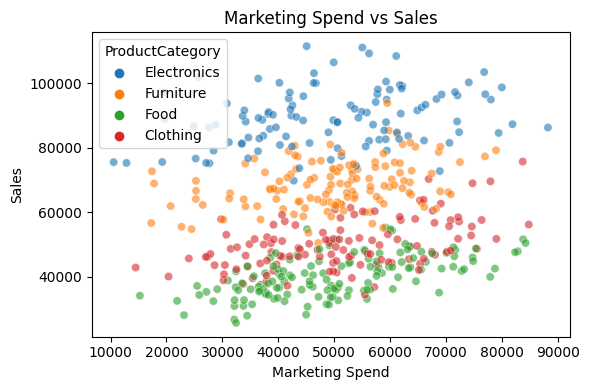

In [4]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='MarketingSpend', y='Sales', hue='ProductCategory', data=df, alpha=0.6)
plt.title('Marketing Spend vs Sales')
plt.ylabel('Sales')
plt.xlabel('Marketing Spend')
plt.tight_layout()
plt.show()

## Correlation Matrix
Correlation among numeric features.

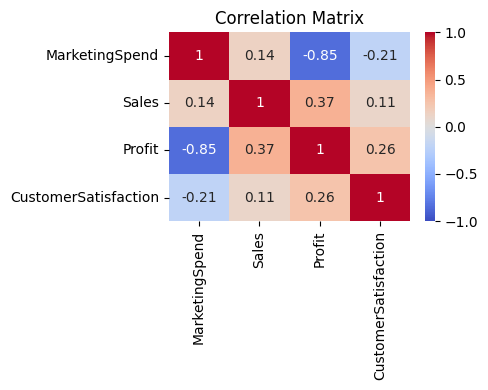

In [5]:
corr = df[['MarketingSpend','Sales','Profit','CustomerSatisfaction']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Predictive Model
We'll build a simple linear regression model to predict `Sales` from `MarketingSpend`, `Region`, and `ProductCategory`.

We'll use dummy variables for categorical features.

In [6]:
# Create dummy variables for categorical columns
df_model = df.copy()
X = pd.get_dummies(df_model[['MarketingSpend','Region','ProductCategory']], drop_first=True)
y = df_model['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

5507.778583878234

## Predicted vs Actual Sales
Scatter plot comparing predicted sales to actual sales on the test set.

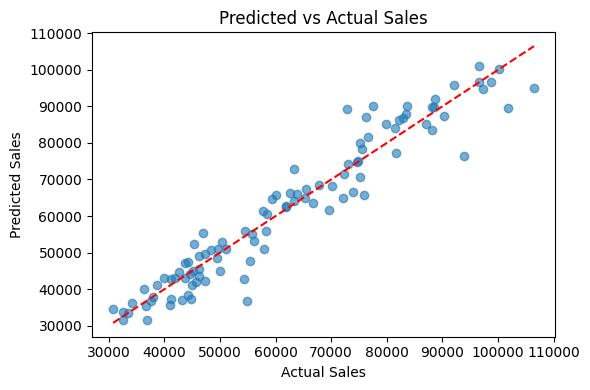

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.tight_layout()
plt.show()